# Bài 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imhist(img):
    m,n = img.shape

    hist = [0]*256
    for i in range(m):
        for j in range(n):
            hist[img[i,j]] += 1

    return np.array(hist)

In [3]:
imgHigh = cv2.imread("high.png",0)
imgLow = cv2.imread("low.png",0)

In [4]:
high = imhist(cv2.imread("high.png",0))
low = imhist(cv2.imread("low.png",0))

In [5]:
def gamma(img, g):
  newImg = np.power(img/255, g)*255
  return newImg.astype(np.uint8)

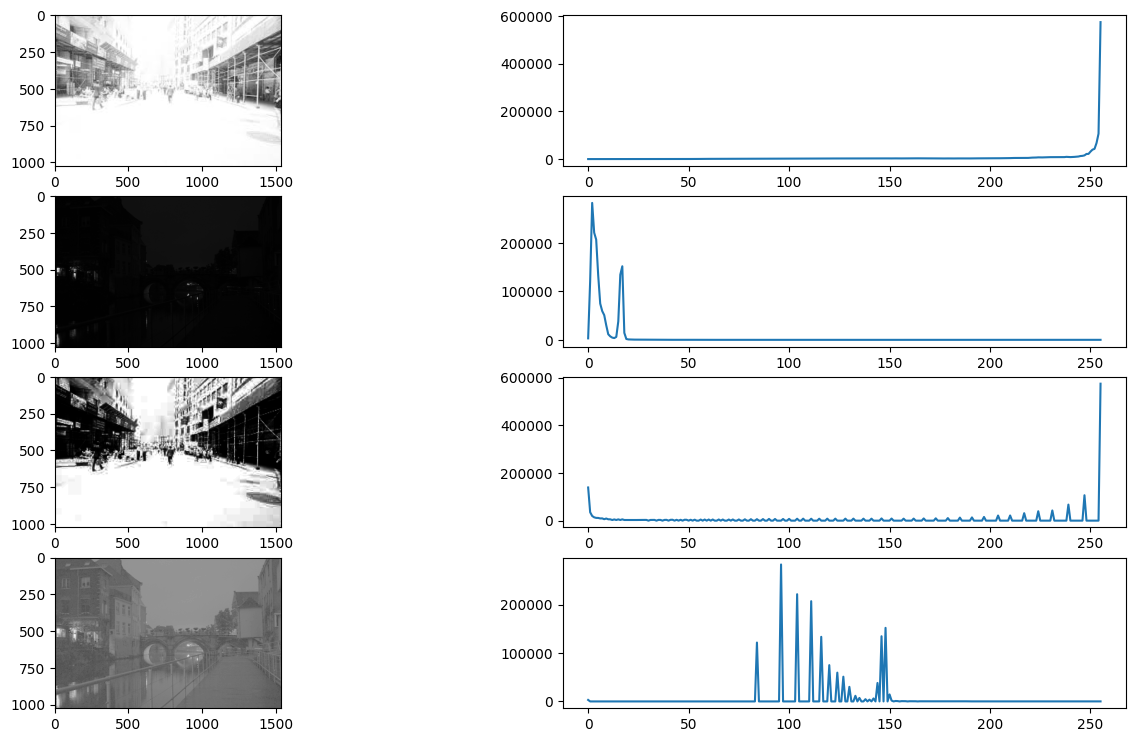

In [59]:
fig = plt.figure(figsize = (16,9))

(ax1,ax2),(ax3,ax4),(ax5,ax6), (ax7,ax8) = fig.subplots(4,2)

ax1.imshow(imgHigh,"gray")
ax2.plot(high)

ax3.imshow(imgLow,"gray")
ax4.plot(low)

ax5.imshow(gamma(imgHigh, 8),"gray")
ax6.plot(imhist(gamma(imgHigh, 8)))

ax7.imshow(gamma(imgLow, 0.2),"gray")
ax8.plot(imhist(gamma(imgLow, 0.2)))

# Bài 2

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread("a4.png")

## Xác định 4 đường thẳng là viền của tờ giấy trong ảnh

In [54]:
gray = cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE)

In [55]:
canny = cv2.Canny(gray, 100, 200)

In [56]:
lines = cv2.HoughLines(canny,1,np.pi/120,142)

In [57]:
copy = img.copy()

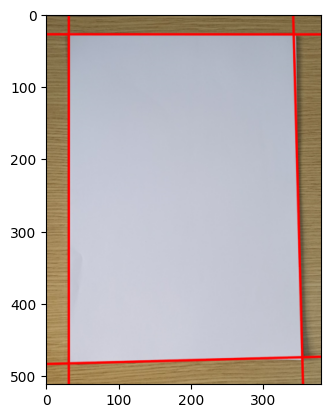

In [58]:
for line in lines:
  rho,theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a* rho
  y0 = b* rho
  pt1 = (int(x0+1000*(-b)),int(y0+1000*(a)))
  pt2 = (int(x0-1000*(-b)),int(y0-1000*(a)))

  cv2.line(copy,pt1,pt2,(0,0,255),2,cv2.LINE_AA)

plt.imshow(copy[...,::-1])

## Xác định tọa độ 4 góc của tờ giấy A4

In [52]:
def timGiaoDiem(line1, line2):

  rho1, theta1 = line1
  rho2, theta2 = line2

  a1 = np.cos(theta1)
  b1 = np.sin(theta1)
  a2 = np.cos(theta2)
  b2 = np.sin(theta2)

  if a1 * b2 - a2 * b1 == 0:
    return None

  x = (b2 * rho1 - b1 * rho2) / (a1 * b2 - a2 * b1)
  y = (a1 * rho2 - a2 * rho1) / (a1 * b2 - a2 * b1)

  return (int(x), int(y))

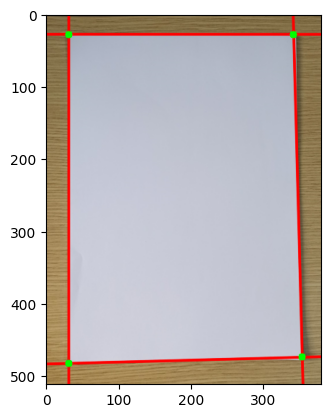

In [53]:
giaoDiems = []
for i in range(len(lines)):
  for j in range(i + 1, len(lines)):
    giaoDiem = timGiaoDiem(lines[i][0], lines[j][0])
    if giaoDiem is not None:
      giaoDiems.append(giaoDiem)

for point in giaoDiems:
  cv2.circle(copy, point, 5, (0, 255, 0), -1)

plt.imshow(copy[..., ::-1])